## THE SPARKS FOUNDATION

## Data Science & Business Analytics Internship - MAY21 

### USHASI UPADHYAY
### TASK 1: Prediction Using Supervised ML

##### First we try to understand the dataset given to us 

In [1]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

In [3]:
#Reading the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)

#using dataframe.head to check if we have the right type of data
print('Printing the first 5 rows of the dataset : ')
data.head()

Printing the first 5 rows of the dataset : 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# using dataframe.shape to return tuple of shape (Rows, columns) of dataframe/series
print(data.shape)

(25, 2)


In [5]:
# using dataframe.describe to return the statistical summary of the Series and DataFrame
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [6]:
# using dataframe.info to get a concise summary i.e exploratory analysis of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [7]:
# checking if there is any missing values in the dataframe 
data.isnull().values.any()

False

 So there is no missing values and thus cleaning the data is not needed !

##### Now we try to visualize the dataset 

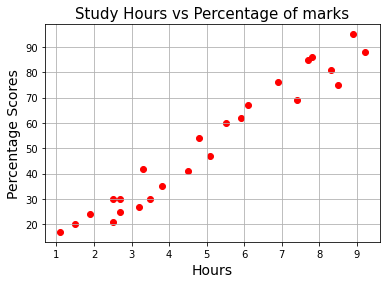

In [8]:
#Visualizing the dataframe using a scatterplot
plt.scatter(data.Hours,data.Scores,color='red')  
plt.title('Study Hours vs Percentage of marks',fontsize=15)  
plt.xlabel('Hours',fontsize=14)  
plt.ylabel('Percentage Scores',fontsize=14) 
plt.grid(True)
plt.show()


From the Scatter Polt, it is clear that "Hours" and "Percentage Scores" have a positive Linear relationship.

In [9]:
#Verifying presence of linear relationship using corr() function to find the correlation 
# among the columns using Pearson's method

data.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


So, we can apply Linear Regression Model to predict the percentage score opf a student as required by our required task!

In [10]:
#Dividing the dataset into dependent(output) and independent(input) variables
x = data[['Hours']]     #Input
y = data['Scores']    #Output

In [11]:
print ("(Index)(Value of x) \n")
print (x)
print ()
print ("(Index)(Value of y) \n")
print (y)

(Index)(Value of x) 

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8

(Index)(Value of y) 

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


Now, it's time to split our Dataset into a Training set and Testing Data - 80% for training, and 20% for testing. Train/Test is a method to train (create) the model and test(measure) its accuracy.

In [12]:
#Splitting the Data set in the 80-20 ratio using Scikit-Learn's built in train_test_split() method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=12)


LinearRegression() fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the 
linear approximation.


In [13]:
#Using LinearRegression() to train our algorithm
lm =LinearRegression()  
model=lm.fit(x_train, y_train) 


In [14]:
print("Intercept:                               ", model.intercept_)
print("Coefficient of the independent variable: ",model.coef_)
print("\nTraining complete.")

Intercept:                                2.8906997426063086
Coefficient of the independent variable:  [9.65531967]

Training complete.


In [15]:
#Regression Line
line = model.intercept_ + model.coef_*x


##### Now we visualize the regression line  

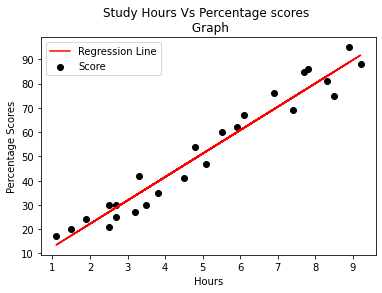

In [16]:
plt.scatter(data.Hours,data.Scores,label='Score',color='black')
plt.title("Study Hours Vs Percentage scores \n Graph")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.plot(x,line, color = "red", label = "Regression Line")
plt.legend()
plt.show()

Now we predict values of the Y variable(Scores) for the X values(Hours) of the test dataset using our model.

In [17]:
y_predicted = model.predict(x_test)

Now we compare the predicted value with the actual y values in the test dataset to evaluate our model

In [18]:
df = pd.DataFrame({"Actual":y_test,"Predicted": y_predicted})
df

,Actual,Predicted
19,69,74.340065
7,60,55.994958
18,67,61.788150
1,47,52.132830
15,95,88.823045


### Solving the task with this Model 

#### To do : Predict the percentage of Score of a student who studies 9.25 hours per day using the given Dataset. 

In [19]:
task = 9.25
predicted_score = model.predict([[task]])
print("No. of Hours Studied :      ", task)
print("Predicted Percentage Score :",predicted_score[0])

No. of Hours Studied :       9.25
Predicted Percentage Score : 92.2024066507085


In [23]:
#Checking for accuracy using the R-square metric
x=sm.add_constant(x)
mode=sm.OLS(y,x).fit()
predictions=mode.predict(x)
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 13 May 2021   Prob (F-statistic):           9.13e-17
Time:                        17:56:46   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

#### After the last step, we can comment that as THE R-SQUARED value IS 0.953 it means EXPLAINED VARIABILITY of our Model is 95.3% ,which means it can give 95.3% accurate results which is quite good.

In [22]:
#Checking Absolute Error

print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_predicted))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_predicted))

Mean Absolute Error : 5.173348586293498
Mean Squared Error : 27.244152583776987


# Conclusion

#### Our model predicts that for a student studying 9.25 Hrs a day , his score is 92.2024 with 95.3% accuracy.